In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('adult_data.csv')

In [ ]:
df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   education       32560 non-null  object
 3   education_num   32560 non-null  int64 
 4   marital_status  32560 non-null  object
 5   occupation      32560 non-null  object
 6   relationship    32560 non-null  object
 7   race            32560 non-null  object
 8   sex             32560 non-null  object
 9   capital_gain    32560 non-null  int64 
 10  capital_loss    32560 non-null  int64 
 11  hours_per_week  32560 non-null  int64 
 12  native_country  32560 non-null  object
 13  income          32560 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [ ]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [ ]:
li = ['workclass','education','marital_status','occupation','relationship','race','sex','native_country','income']
for i in li :
    print(i," : ", df[i].unique())

workclass  :  [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education  :  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital_status  :  [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation  :  [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
relationship  :  [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race  :  [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex  :  [' Male' ' Female']
native_country  :  [' United-Stat

In [ ]:
for col in df.columns:
    df[col] = df[col].replace(" ?", df[col].mode()[0])

In [ ]:
from sklearn.preprocessing import LabelEncoder

li = ['workclass','education','marital_status','occupation','relationship','race','sex','native_country','income']
le_df = LabelEncoder()
df_enc = df.copy()
for l in li :
    df_enc[l] = le_df.fit_transform(df[l])

In [ ]:
df_enc.corr().income.sort_values(ascending = False)

income            1.000000
education_num     0.335182
age               0.234039
hours_per_week    0.229690
capital_gain      0.223333
sex               0.215995
capital_loss      0.150523
education         0.079311
race              0.071853
occupation        0.034599
native_country    0.023063
workclass         0.002739
marital_status   -0.199295
relationship     -0.250924
Name: income, dtype: float64

In [ ]:
X = df_enc.drop(["income","workclass"], axis="columns")
y = df_enc["income"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
print("Dimension de X_train : ",X_train.shape)
print("Dimension de X_val : ", X_test.shape)

Dimension de X_train :  (24420, 12)
Dimension de X_val :  (8140, 12)


## ***Decision Tree Classifier***:




In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Prédictions sur l'ensemble de test
y_pred = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      6132
           1       0.61      0.57      0.59      2008

    accuracy                           0.80      8140
   macro avg       0.74      0.73      0.73      8140
weighted avg       0.80      0.80      0.80      8140



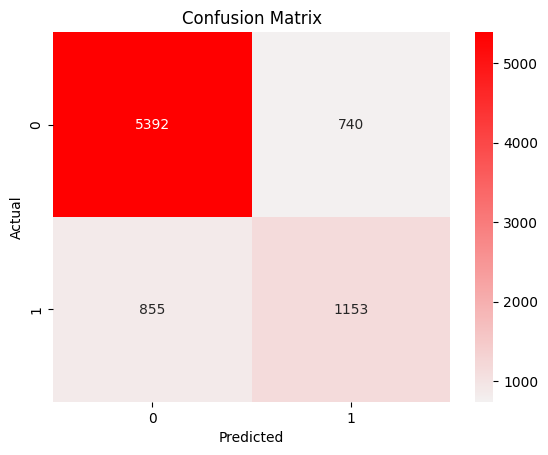

,Accuracy,Precision,Recall,F1,AUC
0,0.804054,0.609086,0.574203,0.59113,0.726762


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
pastel_red_palette = sns.light_palette("Red", as_cmap=True)
sns.heatmap(cm, annot=True, fmt='g',cmap =pastel_red_palette)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
metrics_df = pd.DataFrame({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1, 'AUC': auc}, index=[0])
metrics_df

# ***KNN***

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


# Créer un classifieur KNN
knn = KNeighborsClassifier(n_neighbors=7)

# Effectuer une validation croisée (par exemple, avec une validation croisée à 5 plis)
scores = cross_val_score(knn, X_train, y_train, cv=10)

# Afficher les scores de validation croisée
print("Scores de validation croisée:", scores)

# Afficher la précision moyenne
print("Précision moyenne:", scores.mean())

Scores de validation croisée: [0.83783784 0.83169533 0.84561835 0.83046683 0.83906634 0.84684685
 0.83415233 0.84602785 0.84807535 0.83906634]
Précision moyenne: 0.8398853398853398


In [ ]:
# Définition des valeurs de k à tester
k_values = [1,3,5,9,11]

# Liste pour stocker les scores de validation croisée
cv_scores = []

# Validation croisée pour chaque valeur de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Recherche du meilleur paramètre k
best_k = k_values[cv_scores.index(max(cv_scores))]
print("Meilleur paramètre k trouvé par validation croisée :", best_k)

Meilleur paramètre k trouvé par validation croisée : 11


In [ ]:
# Entraînement du modèle avec le meilleur k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X, y)

# Évaluation sur l'ensemble de test
test_accuracy = best_knn.score(X_test, y_test)
print("Précision sur l'ensemble de test avec le meilleur k :", test_accuracy)

Précision sur l'ensemble de test avec le meilleur k : 0.8656019656019656


In [ ]:
# Prédictions sur l'ensemble de test
y_pred_knn =best_knn.predict(X_test)

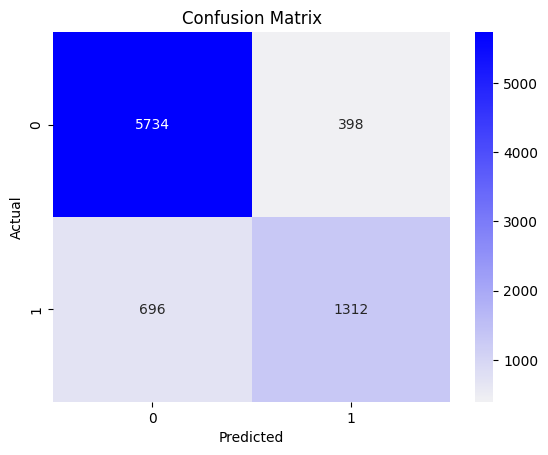

,Accuracy,Precision,Recall,F1,AUC
0,0.865602,0.767251,0.653386,0.705756,0.794241


In [ ]:


cm = confusion_matrix(y_test, y_pred_knn)
pastel_blue_palette = sns.light_palette("blue", as_cmap=True)
sns.heatmap(cm, annot=True, fmt='g',cmap =pastel_blue_palette)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
auc = roc_auc_score(y_test, y_pred_knn)
metrics_df = pd.DataFrame({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1, 'AUC': auc}, index=[0])
metrics_df

standarisation

In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train_s = s.fit_transform(X)
X_test_s = s.transform(X_test)

In [ ]:
# Entraînement du modèle avec le meilleur k
knn_s = KNeighborsClassifier(n_neighbors=best_k)
knn_s.fit(X_train_s, y)

# Évaluation sur l'ensemble de test
test_accuracy = knn_s.score(X_test_s, y_test)
print("Précision sur l'ensemble de test avec le meilleur k :", test_accuracy)

Précision sur l'ensemble de test avec le meilleur k : 0.8572481572481573


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit the scaler to your data and transform it
X_train_n= scaler.fit_transform(X)
X_test_n= scaler.transform(X_test)

In [ ]:
# Entraînement du modèle avec le meilleur k
knn_n = KNeighborsClassifier(n_neighbors=best_k)
knn_n.fit(X_train_n, y)

# Évaluation sur l'ensemble de test
test_accuracy = knn_n.score(X_test_n, y_test)
print("Précision sur l'ensemble de test avec le meilleur k :", test_accuracy)

Précision sur l'ensemble de test avec le meilleur k : 0.8512285012285012


## ***LogisticRegression***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Initialize the logistic regression model
logistic_reg_model = LogisticRegression()

# Train the model on the training data
logistic_reg_model.fit(X,y)

# Evaluate the model on the testing data
accuracy = logistic_reg_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.792014742014742


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Prédictions sur l'ensemble de test
y_pred_LR =logistic_reg_model.predict(X_test)

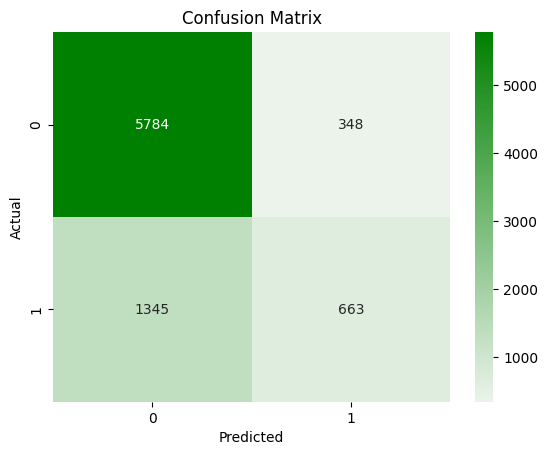

,Accuracy,Precision,Recall,F1,AUC
0,0.792015,0.655786,0.330179,0.439218,0.636714


In [ ]:
cm = confusion_matrix(y_test, y_pred_LR)
pastel_green_palette = sns.light_palette("green", as_cmap=True)
sns.heatmap(cm, annot=True, fmt='g',cmap =pastel_green_palette)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
accuracy = accuracy_score(y_test, y_pred_LR)
precision = precision_score(y_test, y_pred_LR)
recall = recall_score(y_test, y_pred_LR)
f1 = f1_score(y_test, y_pred_LR)
auc = roc_auc_score(y_test, y_pred_LR)
metrics_df = pd.DataFrame({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1, 'AUC': auc}, index=[0])
metrics_df

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Initialize the Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model on the training data
naive_bayes_model.fit(X, y)

# Evaluate the model on the testing data
accuracy = naive_bayes_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7907862407862408


In [ ]:
# Prédictions sur l'ensemble de test
y_pred_NB =logistic_reg_model.predict(X_test)

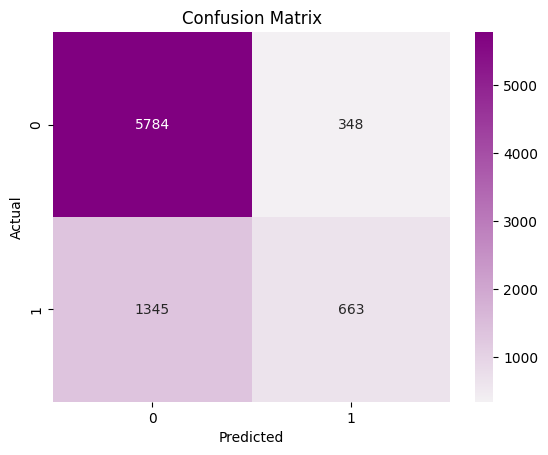

,Accuracy,Precision,Recall,F1,AUC
0,0.792015,0.655786,0.330179,0.439218,0.636714


In [ ]:
cm = confusion_matrix(y_test, y_pred_NB)
pastel_purple_palette = sns.light_palette("purple",as_cmap=True)
sns.heatmap(cm, annot=True, fmt='g',cmap =pastel_purple_palette)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
accuracy = accuracy_score(y_test, y_pred_NB)
precision = precision_score(y_test, y_pred_NB)
recall = recall_score(y_test, y_pred_NB)
f1 = f1_score(y_test, y_pred_NB)
auc = roc_auc_score(y_test, y_pred_NB)
metrics_df = pd.DataFrame({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1, 'AUC': auc}, index=[0])
metrics_df

## **CatBoostClassifier**

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

# Initialize CatBoost classifier with best parameters
best_cb_model = CatBoostClassifier()

# Fit the CatBoost model to your training data
best_cb_model.fit(X, y)

In [ ]:
y_p = best_cb_model.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_p))

0.8837837837837837


In [ ]:
# Initialiser le modèle CatBoost avec les meilleurs hyperparamètres trouvés
best_cb_model = CatBoostClassifier(iterations=300,
                                   depth=8,
                                   learning_rate=0.1,
                                   l2_leaf_reg=5,
                                   border_count=128,
                                   random_strength=0.5)

# Entraîner le modèle sur les données d'entraînement
best_cb_model.fit(X, y)

In [ ]:
y_p = best_cb_model.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_p))

0.8872235872235872


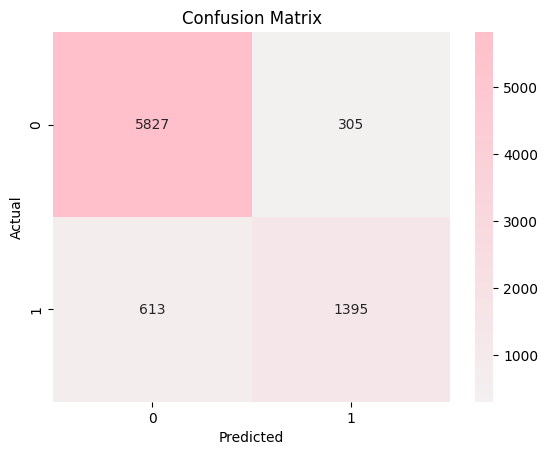

,Accuracy,Precision,Recall,F1,AUC
0,0.887224,0.820588,0.694721,0.752427,0.822491


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_p)
pastel_pink_palette = sns.light_palette("pink", as_cmap=True)
sns.heatmap(cm, annot=True, fmt='g',cmap =pastel_pink_palette)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
accuracy = accuracy_score(y_test, y_p)
precision = precision_score(y_test, y_p)
recall = recall_score(y_test, y_p)
f1 = f1_score(y_test, y_p)
auc = roc_auc_score(y_test, y_p)
metrics_df = pd.DataFrame({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1, 'AUC': auc}, index=[0])
metrics_df